<a href="https://colab.research.google.com/github/Villagran29A/Bias-and-variance-on-nonlinear-dataAssignment/blob/main/VillagranGabriel_Bias__and_variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Homework: Bias and variance 
Villagran Saucedo Gabriel Aldair 

Undergraduate, 2017 generation, 267572, 201702370947

Dr. Cuevas Tello Juan Carlos

Aprendizaje Automatico (Machine Learning) 

8/02/2022                                     

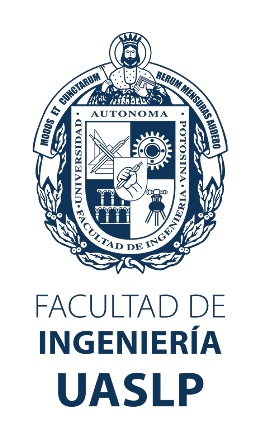


# Abstract
In this jupyter notebook you are going to find a new way to work with the nonlinear data, in this case I am going to use the same files of the last homework (nonlinear datasets:  DS-5-1-GAP-1-1-N-1  and DS-5-1-GAP-5-1-N-3), the differences is that we need to perform 100 polynomial models instead of only one.

And also I am going to calculate the Bias and the variance.

- bias(mean) = the diference of the ground truth and the mean of all regression model
- variance = standard derivation for testing or training

I made use of some functions that were taught in class but also I need to investigate new ones to find the bias and the variance.

#Loading data from Drive
In this part I'm uploading my google drive files to colab, this will make the work easier, once I uploaded I show only the **ArtificialData directory, this one was provided by the profesor** just to see the files that are there

In [52]:
from google.colab import  drive
drive.mount('/content/drive/')
!ls "/content/drive/MyDrive/Colab Notebooks/MachineLearning/ArtificialData"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
DS-5-1-G-0-N-0_error_bars_0-106.eps    DS-5-1-GAP-1-1-N-1_v2.dat
DS-5-1-G-5-1-N-0_error_bars_0-466.eps  DS-5-1-GAP-5-1-N-3_v2.csv
DS-5-1-GAP-0-1-N-0_v2.csv	       DS-5-1-GAP-5-1-N-3_v2.dat
DS-5-1-GAP-0-1-N-0_v2.dat	       underlying_DS-5-1.jpg
DS-5-1-GAP-1-1-N-1_v2.csv


#Saving the Nonlinear data into variables

Here I'm loading *.csv datasets and assigning to each file variable, I made this for two reasons:

1-. Have the three datasets ready to use

2-. Have separated for each purpose 
- DS-5-1-GAP-0-1-N-0_v2.csv -> Ground truth
- DS-5-1-GAP-1-1-N-1_v2.csv -> Training
- DS-5-1-GAP-5-1-N-3_v2.csv -> Training

Text(0.5, 1.0, 'dataset: /content/drive/MyDrive/Colab Notebooks/MachineLearning/ArtificialData/')

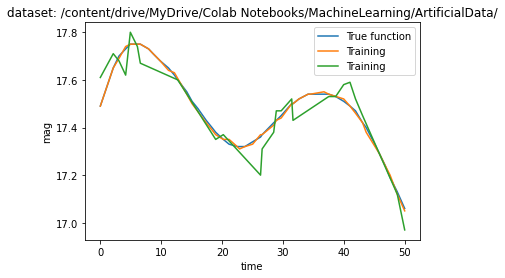

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/MachineLearning/ArtificialData/'
FILE1_csv = 'DS-5-1-GAP-0-1-N-0_v2.csv'
FILE2_csv = 'DS-5-1-GAP-1-1-N-1_v2.csv'
FILE3_csv= 'DS-5-1-GAP-5-1-N-3_v2.csv'
#Saving the FILE1 into d variable
d1 = pd.read_csv(DATA_PATH + FILE1_csv, header=None)
d2 = pd.read_csv(DATA_PATH + FILE2_csv, header=None)
d3 = pd.read_csv(DATA_PATH + FILE3_csv, header=None)
#plotting the datasets
plt.plot(d1[0], d1[1], label="True function")
plt.plot(d2[0], d2[1], label="Training")
plt.plot(d3[0], d3[1], label="Training")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("dataset: "+ DATA_PATH)

In [ ]:
# Display the first five rows
d1.head()

In [ ]:
# Display the first five rows
d2.head()

In [ ]:
# Display the first five rows
d3.head()

#Importing the libraries that are necessaries



In [54]:
#Metrics
from sklearn.metrics import mean_squared_error
#Polynomial interpolation
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import numpy as np

#- Perform polynomial regression on 100 curves, i.e. 100 polynomial models.
#- Measure the bias (mean): this is done by obtaining the difference of DS-5-1-GAP-0-1-N-0 (True) and the mean of all regression modeles (A1, A2,....A100)
#- Measure the variance (standard deviation) either on training data or testing data: this is done by obtaining the standard deviation of all regression models (A1, A2,....A100).

Nonlinear datasets:  DS-5-1-GAP-1-1-N-1  and DS-5-1-GAP-5-1-N-3. Each dataset contains 201 columns, first column has the time, second column A1, third column A2, forth column A3, fifth column A4, and so on, use A1, A2,....A100

#Performing polynomial regression on 100 curves, i.e. 100 polynomial models.
The variables train and test save the polynomial regression for the 1 noise data.

The variables train2 and test2 save the polynomial regression for the 1 noise data.

In [ ]:
#Loading the data
import pandas as pd
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/MachineLearning/ArtificialData/'
FILE_TRUE = 'DS-5-1-GAP-0-1-N-0_v2.csv'
FILE_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
FILE_NOISE2 = 'DS-5-1-GAP-5-1-N-3_v2.csv'
#creating an array to  save the MSE
train = [200]
test = [200]
train2 = [200]
test2 = [200]
#Reading True data
d_true = pd.read_csv(DATA_PATH + FILE_TRUE,header=None)
#Reading Noise1 data
d_noise1 = pd.read_csv(DATA_PATH + FILE_NOISE1,header=None)
#Reading Noise2 data
d_noise2 = pd.read_csv(DATA_PATH + FILE_NOISE2,header=None)
#Calculating polynomial regression for each column
for mod in range (1, 101):
  #polynomial degree (this was the best value)
  degree = 9
  #calculating the polynomial regression
  model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

  #DATA_PATH_NOISE1 = DS-5-1-GAP-1-1-N-1_v2.csv
  X = d_noise1[0]  #time
  x= X[:100, np.newaxis]
  Y = d_noise1[mod]  
  y = Y[:, np.newaxis]
  #Ground Truth data
  X_test = d_true[0]
  Y_test = d_true[1]

  #Training
  model.fit(x, y)  #get polynomial model for training data

  x_test = X_test[:, np.newaxis]
  y_test = Y_test[:, np.newaxis]

  #Testing
  y_pred_train = model.predict(x) 
  y_pred_test = model.predict(x_test)
  #Calculating the MSE
  MSE_train = mean_squared_error(y,y_pred_train)
  MSE_test = mean_squared_error(y_test,y_pred_test)

  #Saving the values into an array
  train.append(MSE_train)
  test.append(MSE_test)

#At this point we have our polynomial regression already calculated, now we are going to print the MSE

In [ ]:
print("Lenght of the MSE_test and MSE_train array: ",len(test), len(train))
for i in range (1, 101):
  print(i)
  print("MSE train ", train[i])
  print("MSE test ",test[i])
  print("======================")

Plotting the regression

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


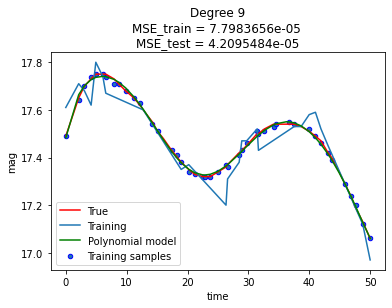

In [57]:
import matplotlib.pyplot as plt
x_test = X_test[:100, np.newaxis]
y_test = Y_test[:100, np.newaxis]
y_pred_test = model.predict(x_test)

plt.plot(x_test,y_test, color='r', label="True")
plt.scatter(X, y, edgecolor='b', s=20, label="Training samples")
plt.plot(d3[0], d3[1], label="Training")

plt.plot(x_test, y_pred_test, color='g', label="Polynomial model")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("Degree {}\nMSE_train = {:.8} \nMSE_test = {:.8}".format(
        degree, MSE_train, MSE_test))
plt.show()

Performing polynomial regression for the noise data 2 (DS-5-1-GAP-5-1-N-3_v2.csv)

In [ ]:
#Calculating polynomial regression for each column
for mod in range (1, 101):
  # DATA_PATH_NOISE2 = 'DS-5-1-GAP-5-1-N-3_v2.csv'
  X = d_noise2[0]  #time
  x = X[:, np.newaxis]
  Y = d_noise2[mod]  #mag_A
  y = Y[:, np.newaxis]

  #Training
  model.fit(x, y)  #get polynomial model for training data

  #Testing
  y_pred_train = model.predict(x) 
  y_pred_test = model.predict(x_test)


  MSE_train = mean_squared_error(y,y_pred_train)
  MSE_test = mean_squared_error(y_test,y_pred_test)

  #Saving the values into an array
  train2.append(MSE_train)
  test2.append(MSE_test)

We are going to print the MSE

In [ ]:
print("Lenght of the MSE_test and MSE_train array: ",len(test2), len(train2))
for i in range (1, 101):
  print(i)
  print("MSE train ", train2[i])
  print("MSE test ",test2[i])
  print("======================")

Plotting the data

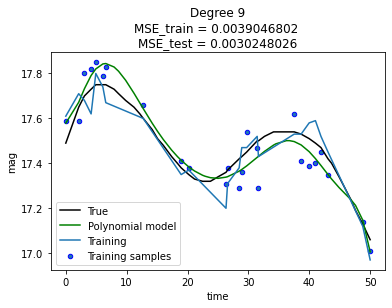

In [60]:
import matplotlib.pyplot as plt
plt.plot(x_test,y_test, color='k', label="True")
plt.scatter(X, y, edgecolor='b', s=20, label="Training samples")
plt.plot(x_test, y_pred_test, color='g', label="Polynomial model")
plt.plot(d3[0], d3[1], label="Training")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("Degree {}\nMSE_train = {:.8} \nMSE_test = {:.8}".format(
        degree, MSE_train, MSE_test))
plt.show()

#Calculating the BIAS for each data
for the first noisy data which is DS-5-1-GAP-1-1-N-1_v2.csv

In [78]:
#Calculating the bias and variance 
bias = np.mean(train)
print("the bias (mean) for noisy data 1 is:", bias)
print("============================================================")
variance = np.var(train)
print("the variance =", variance)


the bias (mean) for noisy data 1 is: 1.9803073101571096
the variance = 392.1179869354181


for the second noisy data which is DS-5-1-GAP-5-1-N-3_v2.csv

In [77]:
#Calculating the bias and variance of testing data
bi = np.mean(train2)
print("the bias (mean) for noisy data 1 is:", bi)
print("============================================================")
vari = np.var(train2)
print("the variance =", vari)

the bias (mean) for noisy data 1 is: 1.9844795897088454
the variance = 392.10146559280923


#General conclusion
This activity was interesting because I learned how to obtain the polynomial regression for the first 100 models, and then I learned how to obtain the BIAS and the Variance in this case I made use of the function that is implemented on numpy (mean and var).
I modify the code of the last homework this was because most of the code was useful to calculate, plot and open the data, 

References
- https://numpy.org/doc/stable/reference/generated/numpy.mean.html 